# Cálculo de Entropia

## Discreta

In [ ]:
import numpy as np
from scipy.stats import entropy, rv_discrete
np.random.seed(1)

values = [1, 2, 3]
probabilities = [0.2, 0.3, 0.5]

dist = rv_discrete(values=(values, probabilities))
data = np.array(dist.rvs(size = 1000))

estimated_probabilities = [np.sum(data == i)/np.size(data) for i in set(data) ]

# counts, bins = np.histogram(data, bins=3, density=False)
# pmf = counts / len(data)
#* Não sei como ajustar automaticamente a saída do bins pro plot
 
print('PMF estimada: ', estimated_probabilities)
print('PMF real:     ', probabilities)

print('Entropia estimada: ', entropy(estimated_probabilities))
print('Entropia real:     ', entropy(probabilities))

print('Distância KL-1: ', entropy(estimated_probabilities, probabilities))
print('Distância KL-2: ', entropy(probabilities, estimated_probabilities))  

PMF estimada:  [0.203, 0.291, 0.506]
PMF real:      [0.2, 0.3, 0.5]
Entropia estimada:  1.0276098398302924
Entropia real:      1.0296530140645737
Distância KL-1:  0.0001946158160097168
Distância KL-2:  0.0001957543140255454


## Contínua

Entropia estimada:  1.416449063083199
Entropia real:      1.4189385332046727


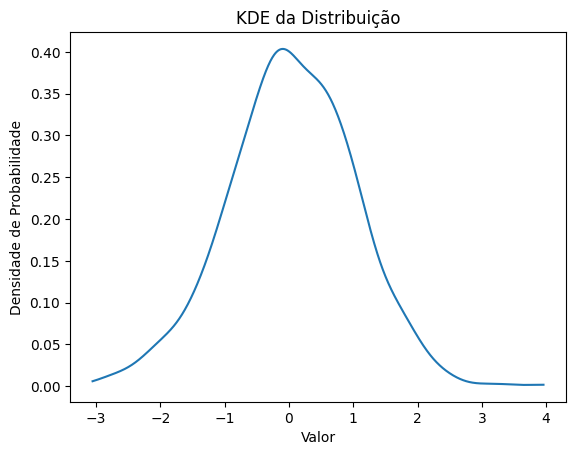

In [ ]:
# KDE
from scipy.stats import gaussian_kde
np.random.seed(1)

data = np.random.normal(size=(1000))

kde = gaussian_kde(data)
x_grid = np.linspace(data.min(), data.max(), 1000)

density = kde(x_grid)

epsilon = 1e-12
entropia = -np.trapz(density * np.log(density + epsilon), x_grid)

print('Entropia estimada: ',entropia)
print('Entropia real:     ', 0.5*(np.log(2*np.pi) + 1))

plt.plot(x_grid, density)
plt.xlabel('Valor')
plt.ylabel('Densidade de Probabilidade')
plt.title('KDE da Distribuição')
plt.show()

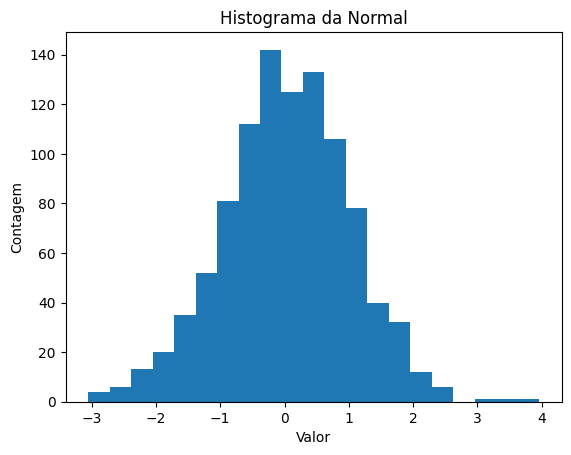

P(x > 0):  0.627
Entropia estimada:  2.43755888895662


In [ ]:
# Histograma
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)

data = np.random.normal(size=(1000))

counts, bins = np.histogram(data, bins=20, density=False)
idx = np.where((bins > 0))[0]
probability = np.sum(counts[idx - 1])/data.size

plt.hist(data, bins.size)
plt.xlabel('Valor')
plt.ylabel('Contagem')
plt.title('Histograma da Normal')
plt.show()

print('P(x > 0): ', probability)

print('Entropia estimada: ', entropy(counts/data.size))
